# Exercise e02 - Infrared laser beam
\- Gugliemo Grillo

<div>
<center>
    <img src="https://i.ibb.co/tHmzJ7Z/Final-Instructionsexercises-7.png" width="400"/>
</center>
</div>

### Mean Value
The first step is to evaluate the number of photons arriving per unit time. By remembering that the energy of a photon can be written as $E = h \nu = h c/\lambda$ the number of photons is: $n_\gamma = \frac{P \lambda}{h c}$. The mean value of the voltage can therefore be written as:

$$ <V(t)>_t = \int _{-\infty} ^{+\infty} s(t) \frac{P \lambda}{h c} dt = \int _{-\infty} ^{+\infty} s(t) \frac{P \lambda}{h c}e^{-i\omega t} dt \mid _{\omega = 0} = \frac{P \lambda}{h c} \mathcal{FT}[s(t)](\omega=0) = \frac{P \lambda}{h c}s(\omega=0) = \frac{P \lambda}{h c}V_0 (\tau_2 - \tau_1)$$

In [1]:
# packages used
import scipy.constants
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import display, Math

# Given constans
TAU1 = 100e-6 #sec
TAU2 = 1e-3 #sec
V0 = 1e-3 #V
LAMBDA = 1e-6 #m
P = 10e-12 #W
c = scipy.constants.c
h = scipy.constants.h

# Mean:
n = P*LAMBDA/(h*c)
Vm =  n * V0 * (TAU2-TAU1)

# Show value
display(Math(r'<V(t)>_t\ ={:.5e} V'.format(Vm)))

<IPython.core.display.Math object>

### PSD
To evaluate the PSD it's firstly mandatory to understand what type of process is this. As the photons' time of arrival is unknown but the mean arrival per unit of time is known, the process is assumed to be a **shot process** or **shot noise**. In that case the PSD can be evaluated as:
$$ S_{V,V}(\omega)= |s(\omega)|^2 S_{\gamma, \gamma} = \frac{V_0 (\tau_2 - \tau_1)^2}{(1-\omega^2\tau_1 \tau_2)^2 + \omega^2 (\tau_2 + \tau_1)} \frac{P \lambda}{hc}$$

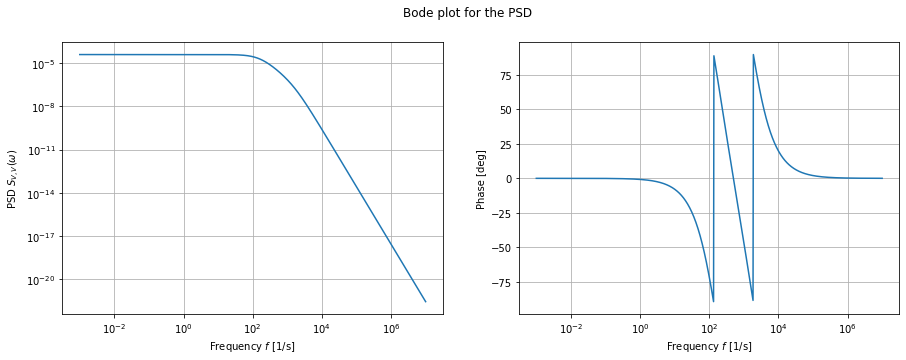

In [2]:
def H(omega):
    return V0*(TAU2-TAU1)/( (1+1j*omega*TAU1)*(1+1j*omega*TAU2))

f = np.logspace(-3, 7, num=1000, base=10, endpoint=True)
h = np.power( H(2*np.pi*f), 2)*n

mag = np.abs(h)
phase = np.arctan(np.imag(h) / np.real(h))*180/np.pi

# Bode plot
fig, axis = plt.subplots(1,2, figsize=(15, 5))
fig.suptitle('Bode plot for the PSD')

axis[0].plot(f, mag)
axis[0].set_xscale('log')
axis[0].set_yscale('log')
axis[0].set_xlabel("Frequency $f$ [1/s]")
axis[0].set_ylabel(r"PSD $S_{V,V}(\omega)$")
axis[0].grid(True, which="both")

axis[1].plot(f, phase)
axis[1].set_xscale('log')
axis[1].set_xlabel("Frequency $f$ [1/s]")
axis[1].set_ylabel("Phase [deg]")
axis[1].grid(True, which="both")

plt.show()

### Autocorrelation
The shortest way to deal with this point would be to just take the inverse Fourier transform of the PSD. Sadly [WolframAlpha](https://www.wolframalpha.com/input/?i=inverse+fourier+transform+1%2F%28+%281-w%5E2+*+C%29%5E2+%2B+w%5E2*B%29) can't inverse Fourier the PSD. I'm not going to try and solve it by hand. Instead I'll evaluate the impulse response from the frequency response and evaluate the autocorrelation of the process form the autocorrelation of the shot noise.

#### Evaluation of $\mathcal{FT}^{-1}(s(\omega))$
The fraction can be decomposed as:
$$s(\omega)=V_0\frac{\tau_2 - \tau_1}{(1+i \omega \tau_1)(1+i \omega \tau_2)} = V_0\bigl[\frac{-\tau_1}{(1+i \omega \tau_1)} + \frac{\tau_2}{(1+i \omega \tau_2)}\bigr]$$.

This allow for an easier evaluation of the inverse transform as $\mathcal{FT}^{-1}\bigl[ \frac{1}{a+i\omega}\bigr](t) = e^{-at}\theta(t)$. This implies:

$$ s(t) = \theta(t)\bigl[ e^{-t/\tau_2} - e^{-t/\tau_1}\bigr]$$

#### Evaluation of the Autocorrelation
The autocorrelation of the shot noise is $R_{\gamma, \gamma}(\Delta t) =\frac{P \lambda}{ch} \delta(t)$ which implies:

$$R_{V, V}(\Delta t) = \bigl(\frac{P \lambda}{ch}\bigr)^2 \int _{-\infty}^{+\infty}\int _{-\infty}^{+\infty} \theta(t')\bigl[ e^{-t'/\tau_2} - e^{-t'/\tau_1}\bigr] \theta(t'')\bigl[ e^{-t''/\tau_2} - e^{-t''/\tau_1}\bigr]\delta(\Delta t + t' - t'') dt' dt''$$

$$R_{V, V}(\Delta t) = \bigl(\frac{P \lambda}{ch}\bigr)^2
        \int _{-\infty}^{+\infty} \theta(t')\bigl[ e^{-t'/\tau_2} - e^{-t'/\tau_1}\bigr] \theta(\Delta t + t')\bigl[ e^{-(\Delta t + t')/\tau_2} - e^{-(\Delta t + t')/\tau_1}\bigr]\delta(\Delta t + t') dt'$$
        
$$R_{V, V}(\Delta t) = \bigl(\frac{P \lambda}{ch}\bigr)^2
        \theta(-\Delta t)\bigl[ e^{-(-\Delta t)/\tau_2} - e^{-(-\Delta t)/\tau_1}\bigr] \theta(\Delta t -\Delta t)\bigl[ e^{-(\Delta t -\Delta t)/\tau_2} - e^{-(\Delta t -\Delta t)/\tau_1}\bigr]\delta(\Delta t)$$
        
$$R_{V, V}(\Delta t) = \bigl(\frac{P \lambda}{ch}\bigr)^2
        \theta(-\Delta t)\bigl[ e^{\Delta t/\tau_2} - e^{\Delta t/\tau_1}\bigr] \theta(0)[ 1 - 1]\delta(\Delta t)=0$$

This means that the process varies so fast that no correlation exist between samples at different times (assuming $\Delta t \neq 0$). This could be a product of the shot noise (which has instantaneous autocorrelation) with a memoryless system.

### Is the process approximately Gaussian?

Yes, as the process is originated by a shot noise process with an high number of events per unit of time.
<!-- I'm not so sure due to the previous result... -->

In [3]:
display(Math(r"\textit{number of events per unit of time: }"+r"{:.5e}\ [1/s]".format(n)))

<IPython.core.display.Math object>